In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
pip install fastparquet

Note: you may need to restart the kernel to use updated packages.


In [3]:
# In case kernel has crashed again, load the data here so you can skip all previous cells
data_no_outliers = pd.read_parquet('data/final_data_cleaned_NIET_scaled.parquet')
data_no_outliers.to_csv()

data_no_outliers.head()

,passenger_count,trip_distance,RatecodeID_1.0,RatecodeID_2.0,RatecodeID_3.0,RatecodeID_4.0,RatecodeID_5.0,RatecodeID_6.0,RatecodeID_99.0,payment_type_1,...,Trip_Staten Island->Brooklyn,Trip_Staten Island->Manhattan,Trip_Staten Island->Queens,Trip_Staten Island->Staten Island,trip_duration,pickup_hour,pickup_day,peak_times,weekend,total_amount_no_tip
0,1.0,9.76,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,18.750000,0.0,6.0,0,1,47.250000
1,1.0,7.62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,32.183334,23.0,5.0,0,1,42.299999
2,4.0,20.07,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,34.183334,0.0,6.0,0,1,82.690002
3,3.0,2.34,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,15.000000,0.0,6.0,0,1,20.600000
4,1.0,5.05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,22.200001,0.0,6.0,0,1,31.799999


In [4]:
# Lastly we set create two new dataframes for the features and target variable
y = data_no_outliers['total_amount_no_tip']
X = data_no_outliers.drop(columns=['total_amount_no_tip']) 

# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Manually defined non-one-hot-encoded columns
not_hot_columns = [
    'passenger_count',
    'trip_distance',
    'trip_duration',
    'pickup_hour',
    'pickup_day',
    'peak_times',
    'weekend'
]


In [6]:
# Dropping the target variable from the features not hot columns
X_not_hot_columns = not_hot_columns[:-1]

X_train[X_not_hot_columns].columns

Index(['passenger_count', 'trip_distance', 'trip_duration', 'pickup_hour',
       'pickup_day', 'peak_times'],
      dtype='object')

In [7]:
# For the algorithms to work properly we will now scale the data (except of course for the hot encoded columns)
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train[X_not_hot_columns])
X_test_scaled = scaler.transform(X_test[X_not_hot_columns])

In [8]:
#If you want to keep column names after scaling (for debugging or modeling), wrap the result back in a DataFrame like this:

#scaler = MinMaxScaler()

#X_train_scaled = scaler.fit_transform(X_train[X_not_hot_columns])
#X_test_scaled = scaler.transform(X_test[X_not_hot_columns])


In [9]:
from sklearn.metrics import mean_squared_error, r2_score
# Model trainen
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Voorspellingen maken
y_pred = model.predict(X_test_scaled)

# Model evaluatie
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 21.73300255802612
R-squared: 0.9247256276332009


In [10]:
# Controleer de grootte van de trainings- en testdata
print(f"Aantal voorbeelden in de trainingsset: {X_train_scaled.shape[0]}")
print(f"Aantal voorbeelden in de testset: {X_test_scaled.shape[0]}")


Aantal voorbeelden in de trainingsset: 2472729
Aantal voorbeelden in de testset: 618183


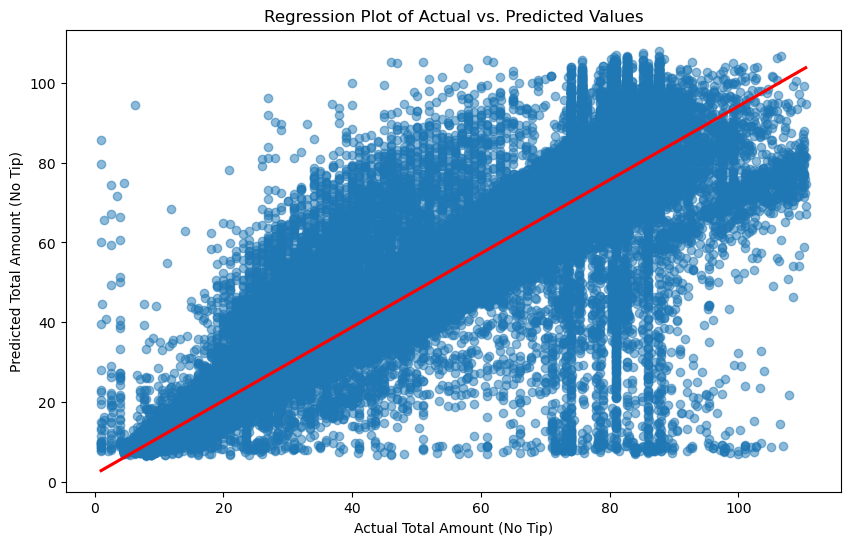

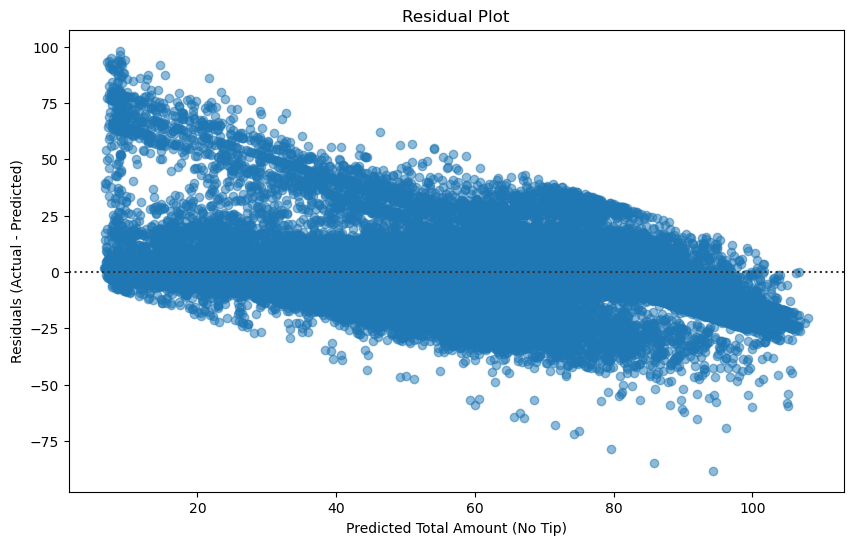

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})

# Labels and title
plt.xlabel('Actual Total Amount (No Tip)')
plt.ylabel('Predicted Total Amount (No Tip)')
plt.title('Regression Plot of Actual vs. Predicted Values')

# Show plot
plt.show()

# Residual plot
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=y_test - y_pred, scatter_kws={'alpha': 0.5})

# Labels and title
plt.xlabel('Predicted Total Amount (No Tip)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')

# Show plot
plt.show()


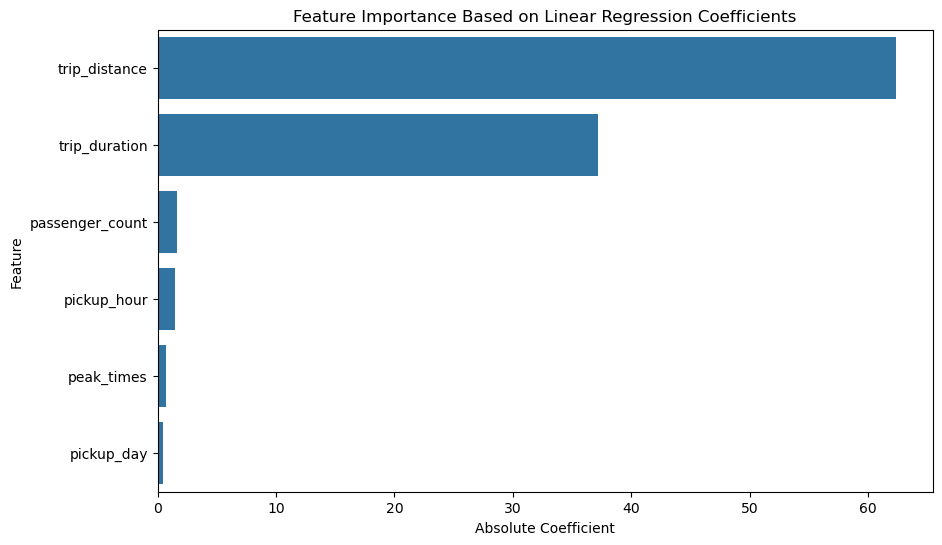

In [13]:
# Get the absolute value of the coefficients
coefficients = model.coef_

# Create a DataFrame to pair the feature names with their corresponding coefficient values
feature_importance = pd.DataFrame({
    'Feature': X_train[X_not_hot_columns].columns,
    'Coefficient': coefficients
})

# Sort the features by absolute coefficient value
feature_importance['Absolute Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Absolute Coefficient', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Absolute Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance Based on Linear Regression Coefficients')
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.show()

